# Experiment 6 : Grow of stables attractors fields in Linear CBN

This experiment explore the grow of stable attractor fields in CBN with Linear topology and same local networks. Its important see what happened with the Linear CBN with more local networks and coupling signals.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the database
df = pd.read_csv("outputs/exp6_linear_aleatory_3_8_100/data.csv")

# show the column names
df.keys()

Index(['i_sample', 'n_local_networks', 'n_var_network', 'v_topology',
       'n_output_variables', 'n_clauses_function', 'n_local_attractors',
       'n_pair_attractors', 'n_attractor_fields', 'n_time_find_attractors',
       'n_time_find_pairs', 'n_time_find_fields'],
      dtype='object')

In [3]:
df[['n_attractor_fields','n_local_networks']]

,n_attractor_fields,n_local_networks
0,4,3
1,8,3
2,8,3
3,8,3
4,2,3
...,...,...
595,1,8
596,1,8
597,0,8
598,256,8


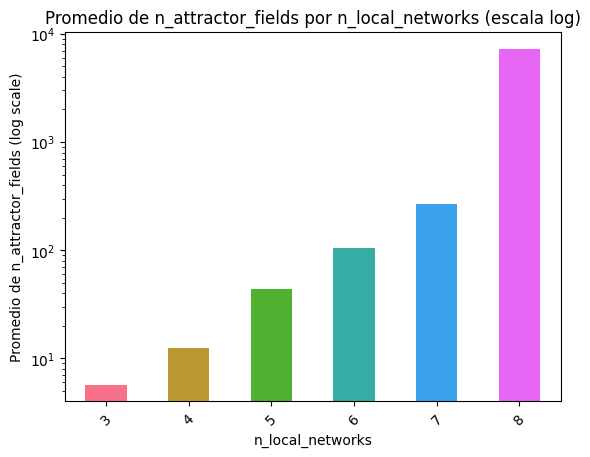

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tu DataFrame se llama df
# df = ...  # Aquí cargarías tu DataFrame

# Agrupar por 'n_local_networks' y calcular el promedio de 'n_attractor_fields'
grouped_data = df.groupby('n_local_networks')['n_attractor_fields'].mean()

# Crear una paleta de colores
palette = sns.color_palette("husl", len(grouped_data))

# Crear el histograma con escala logarítmica en el eje y y colores diferentes
grouped_data.plot(kind='bar', color=palette, logy=True)

# Personalizar el gráfico
plt.title('Promedio de n_attractor_fields por n_local_networks (escala log)')
plt.xlabel('n_local_networks')
plt.ylabel('Promedio de n_attractor_fields (log scale)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.show()

In [21]:
import pandas as pd
import numpy as np

# Suponiendo que tu DataFrame se llama df
# df = ...  # Aquí cargarías tu DataFrame

# Ordenar el DataFrame por 'n_local_networks'
df_sorted = df.sort_values('n_local_networks')

# Calcular la diferencia entre los valores consecutivos de 'n_local_networks'
df_sorted['diff_n_local_networks'] = df_sorted['n_local_networks'].diff()

# Calcular la diferencia entre los valores consecutivos de 'n_attractor_fields'
df_sorted['diff_n_attractor_fields'] = df_sorted['n_attractor_fields'].diff()

# Calcular la tasa de crecimiento por registro
df_sorted['growth_rate'] = np.where(df_sorted['diff_n_local_networks'] != 0, df_sorted['diff_n_attractor_fields'] / df_sorted['diff_n_local_networks'], np.nan)

# Eliminar las filas que contienen NaN
df_sorted = df_sorted.dropna(subset=['growth_rate'])

# Calcular el promedio de todas las tasas de crecimiento
average_growth_rate = df_sorted['growth_rate'].mean()

# Calcular el crecimiento promedio en función de porcentajes
average_growth_rate_percentage = (average_growth_rate / df['n_attractor_fields'].mean()) * 100

print("Crecimiento promedio en función de porcentajes:", average_growth_rate_percentage)



Crecimiento promedio en función de porcentajes: 8.148915612158182


In [22]:
import pandas as pd
import numpy as np

# Suponiendo que tu DataFrame se llama df
# df = ...  # Aquí cargarías tu DataFrame

# Ordenar el DataFrame por 'n_local_networks'
df_sorted = df.sort_values('n_local_networks')

# Calcular la diferencia entre los valores consecutivos de 'n_local_networks'
df_sorted['diff_n_local_networks'] = df_sorted['n_local_networks'].diff()

# Calcular la diferencia entre los valores consecutivos de 'n_attractor_fields'
df_sorted['diff_n_attractor_fields'] = df_sorted['n_attractor_fields'].diff()

# Calcular la tasa de crecimiento por registro
df_sorted['growth_rate'] = np.where(df_sorted['diff_n_local_networks'] != 0, df_sorted['diff_n_attractor_fields'] / df_sorted['diff_n_local_networks'], np.nan)

# Eliminar las filas que contienen NaN
df_sorted = df_sorted.dropna(subset=['growth_rate'])

# Calcular el promedio de todas las tasas de crecimiento
average_growth_rate = df_sorted['growth_rate'].mean()

# Calcular el crecimiento promedio en función de porcentajes
average_growth_rate_percentage = (average_growth_rate / df['n_attractor_fields'].mean()) * 100

print("Crecimiento promedio en función de porcentajes:", average_growth_rate_percentage)

# Calcular el crecimiento para cada cambio en 'n_local_networks'
growth_list = []

for index, row in df_sorted.iterrows():
    growth = row['diff_n_attractor_fields'] / row['diff_n_local_networks']
    growth_list.append(growth)

print("\nLista de crecimientos para cada cambio en n_local_networks:")
print(growth_list)


Crecimiento promedio en función de porcentajes: 8.148915612158182

Lista de crecimientos para cada cambio en n_local_networks:
[16.0, 0.0, -1.0, 128.0, 382.0]


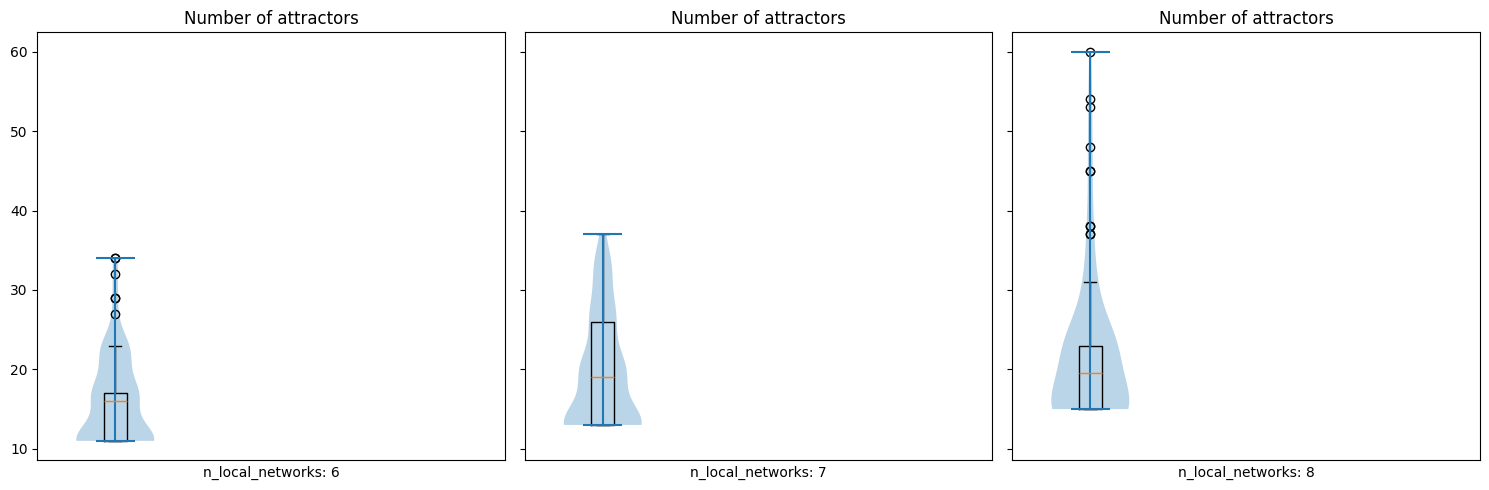

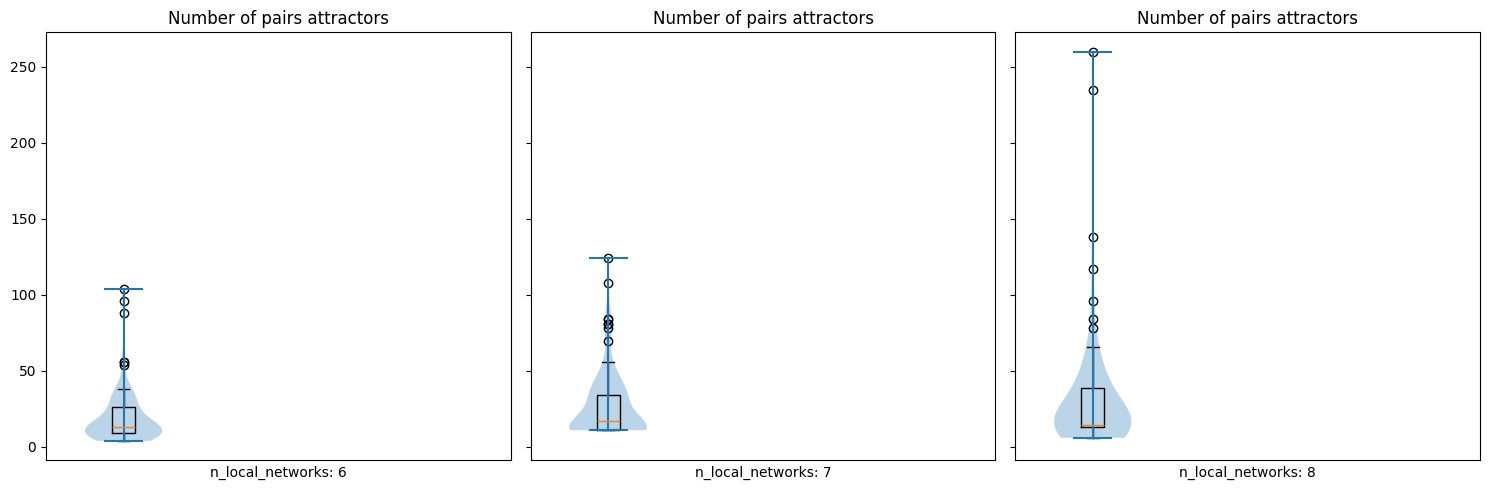

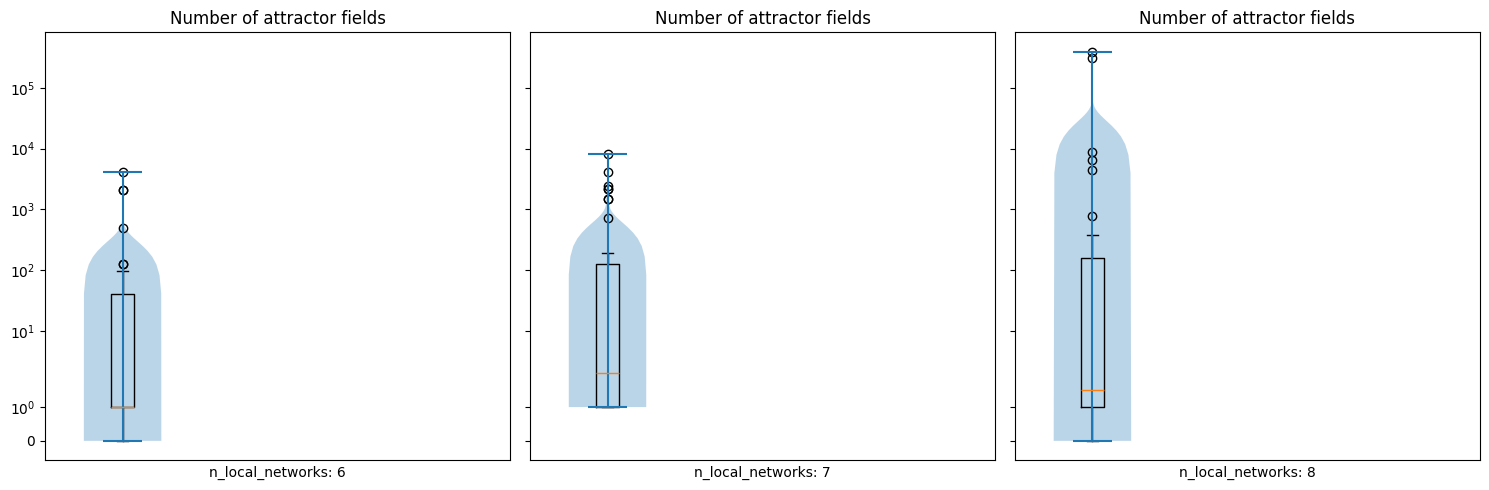

In [32]:
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame se llama df
# df = ...  # Aquí cargarías tu DataFrame

# Filtrar el DataFrame para incluir solo los tres últimos valores de 'n_local_networks'
df_local_networks_n = df[df['n_local_networks'].isin(df['n_local_networks'].unique()[-3:])]

# Violin graphs
grouped = df_local_networks_n.groupby("n_local_networks")

# Define labels for the y-axis
labels = {key: label for key, label in zip(df_local_networks_n.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}

# Define whether to use log scale for each metric
log_scale = {key: label for key, label in zip(df_local_networks_n.keys()[-6:-3], [False, False, True])}

for key in df_local_networks_n.keys()[-6:-3]:
    fig, axs = plt.subplots(1, len(grouped), sharey=True, figsize=(15, 5))  # Ajuste del tamaño de la figura
    for ax, (n_local_networks, group) in zip(axs, grouped):
        data = group[key]
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'n_local_networks: {n_local_networks}')
        ax.set_xticks([])
        ax.set_xlim((0.5, len(grouped) + 0.5))
        ax.set_title(labels[key])
    fig.tight_layout()  # Ajuste del espaciado entre subgráficos
    plt.show()
